# Using the cross-entropy to classify MNIST digits

<img src="../NotebooksFigures/mnist_tsne.png" alt="drawing" width="800" >

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
import mnist_loader 
training_data, validation_data, test_data = mnist_loader.load_data_wrapper() 

Instantiate network of this form

- 30 hidden neurons
- mini-batch size of 10
- $\eta=0.5$ 

<img src="../NotebooksFigures/tikz12.png" alt="drawing" width="600" >

We will show that the cross-entropy loss function works well

In [21]:
import network2
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)

In [22]:
#?net.large_weight_initializer

In [23]:
net.large_weight_initializer()

In [26]:
epochs = 30
batch_size = 10
learning_rate = 0.5

In [24]:
_, evaluation_accuracy, _, training_accuracy = net.SGD(training_data, epochs, batch_size , learning_rate, 
                                                 evaluation_data=test_data,
                                                 monitor_evaluation_accuracy=True,
                                                 monitor_training_accuracy=True)

Epoch 0 training complete
Accuracy on training data: 45432 / 50000
Accuracy on evaluation data: 9122 / 10000
Epoch 1 training complete
Accuracy on training data: 46364 / 50000
Accuracy on evaluation data: 9262 / 10000
Epoch 2 training complete
Accuracy on training data: 46931 / 50000
Accuracy on evaluation data: 9354 / 10000
Epoch 3 training complete
Accuracy on training data: 47014 / 50000
Accuracy on evaluation data: 9372 / 10000
Epoch 4 training complete
Accuracy on training data: 47438 / 50000
Accuracy on evaluation data: 9417 / 10000
Epoch 5 training complete
Accuracy on training data: 47714 / 50000
Accuracy on evaluation data: 9445 / 10000
Epoch 6 training complete
Accuracy on training data: 47625 / 50000
Accuracy on evaluation data: 9434 / 10000
Epoch 7 training complete
Accuracy on training data: 47880 / 50000
Accuracy on evaluation data: 9452 / 10000
Epoch 8 training complete
Accuracy on training data: 47895 / 50000
Accuracy on evaluation data: 9476 / 10000
Epoch 9 training co

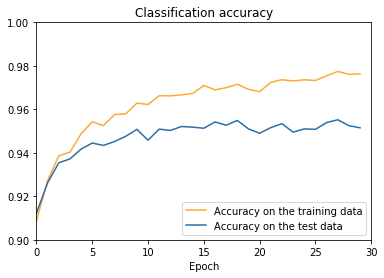

In [43]:
import numpy as np
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(0, epochs, 1), np.array(training_accuracy)/50000, color='#FFA933',
            label="Accuracy on the training data")
ax.plot(np.arange(0, epochs, 1), np.array(evaluation_accuracy)/10000, color='#2A6EA6', 
            label="Accuracy on the test data")
ax.set_xlim(0, epochs)
ax.set_xlabel('Epoch')
ax.set_ylim(0.9, 1)
ax.set_title('Classification accuracy')
plt.legend(loc="lower right")
plt.show()

This shows that the cross-entropy function works well

In [33]:
# save this model in a dictionary with sizes, weights etc...
net.save('net1')

In [34]:
del net

In [37]:
# to reload the network
#net = network2.load('net1')

# Overfitting


We explain now how to create a situation where our network does a bad job generalizing to new situations.
The training is on a small subset of the data so that the network overfits.

Launch the script overfitting.py

- same network
- training on 1000 images 
- 400 epochs

If we do that ...


<img src="../NotebooksFigures/overfitting1.png" alt="drawing" width="600" >


<img src="../NotebooksFigures/overfitting2.png" alt="drawing" width="600" >

we realize that around epoch $\sim 280$ the network overfits : "what our network learns after epoch 280 no longer generalizes to the test data"

Looking at the test accuracy :

<img src="../NotebooksFigures/overfitting4.png" alt="drawing" width="600" >

we can see that the network is memorizing the training set ($100 \%$ accuracy), without understanding the structure of the data ($\sim 82 \%$ accuracy on the test set)

# Regularization

- Early stopping
- Weight decay
- Data augmentation
- Dropout

### Early stopping


We keep track of accuracy on the validation data.
Once the accuracy on the validation_data has saturated, we stop training. 
This strategy is called *early stopping* and could be implemented in many
ways : this require experimentation and common sense.

In the following picture an idealized situation is depicted

<img src="../NotebooksFigures/early_stopping.png" alt="drawing" width="400" >


but in reality there are fluctuations, plateaus etc.

Validation data is used in general to determine the hyper-parameters such as:

- number of epochs of training
- learning rate
- architecture

and also (see below)

- weight decay constant
- dropout level 

This is important in order to avoid overfitting hyper-parameters to the test data !

### Exercise : early stopping

Implement a version of the early stopping using the same architecture, learning
rate and batch size. Look at the accuracy on the validation
data, define a suitable criterion (this will be a matter of your judgement)
and determine the optimal under your criterion number of training epochs.

This is an open exercise, there is not a single solution !

`import mnist_loader
 training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
 ...
 ...`

Let us look again at the accuracies on training and test set we computed before 

<img src="../NotebooksFigures/early_stopping1.png" alt="drawing" width="400" >


Overfitting is much less than in the case in which we train on 1000 images, but it's still there.

This suggests that a strategy to reduce overfitting is to increase the size of the training data, 
also in somewhat artificial ways like data *augmentation*.

### Weight decay

### Data augmentation

### Dropout